# Exercices - Analyse des données 
  
- 189 femmes ayant accouché au Centre Médical de Baystate (MA) en 1989

**Variables**:
- **ID** : numéro d’identifiant
- **AGE** : âge de la mère (en années)
- **LWT** : poids de la mère au dernier cycle menstruel (en livres, 1 livre = 0,4536 kg)
- **PTL** :  nombre d’antécédents de prématurité
- **FVT** : nombre de visites chez le médecin pendant le 1er trimestre de la grossesse
- **BWT** : poids de naissance de l’enfant (en grammes)
- **SMOKE** : statut tabagique de la mère pendant la grossesse
        0 = non fumeuse, 1 = fumeuse

In [1]:
#load libraries
import numpy as np         
import pandas as pd      
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [29]:
url = 'https://raw.githubusercontent.com/acolajanni/Python_DoubleCursus/main/data/Baby_weight.csv'
data = pd.read_csv(url)

data

,ID,AGE,LWT,PTL,BWT,FVT,SMOKE
0,85,19,182,0,2523,0,0
1,86,33,155,0,2551,3,0
2,87,20,105,0,2557,1,1
3,88,21,108,0,2594,2,1
4,89,18,107,0,2600,0,1
...,...,...,...,...,...,...,...
184,79,28,95,0,2466,2,1
185,81,14,100,0,2495,2,0
186,82,23,94,0,2495,0,1
187,83,17,142,0,2495,0,0


## 1. Décrivez le type de valeurs contenu dans chaque colonne, que remarquez-vous ?
- Utiliser la methode <code>.info()</code> sur l'objet 'data'
- Utilisez la methode <code>.astype()</code> pour changer les types de valeurs contenu dans l'objet 'data'. Attention, on ne veut changer le type d'une seule commande uniquement.

In [30]:
# Review data types with "info()".
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      189 non-null    int64
 1   AGE     189 non-null    int64
 2   LWT     189 non-null    int64
 3   PTL     189 non-null    int64
 4   BWT     189 non-null    int64
 5   FVT     189 non-null    int64
 6   SMOKE   189 non-null    int64
dtypes: int64(7)
memory usage: 10.5 KB


In [75]:
data["SMOKE"]=data["SMOKE"].astype("string")

In [76]:
# Review data types with "info()".
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      189 non-null    int64  
 1   AGE     189 non-null    int64  
 2   LWT     189 non-null    int64  
 3   PTL     189 non-null    int64  
 4   BWT     189 non-null    int64  
 5   FVT     189 non-null    int64  
 6   SMOKE   189 non-null    string 
 7   LWT_kg  189 non-null    float64
dtypes: float64(1), int64(6), string(1)
memory usage: 11.9 KB


## 2. Le poids de la mère au dernier cycle menstruel est exprimé en livre, faites la conversion en kg.

Attention, les nombre à virgules s'écrivent avec des points "."

In [77]:
data['LWT_kg'] = data['LWT'] * 0.4536  # ajout d'une nouvelle colonne pour les poids en kg

In [78]:
data

,ID,AGE,LWT,PTL,BWT,FVT,SMOKE,LWT_kg
0,85,19,182,0,2523,0,0,82.5552
1,86,33,155,0,2551,3,0,70.3080
2,87,20,105,0,2557,1,1,47.6280
3,88,21,108,0,2594,2,1,48.9888
4,89,18,107,0,2600,0,1,48.5352
...,...,...,...,...,...,...,...,...
184,79,28,95,0,2466,2,1,43.0920
185,81,14,100,0,2495,2,0,45.3600
186,82,23,94,0,2495,0,1,42.6384
187,83,17,142,0,2495,0,0,64.4112


## 3. Comptez et Comparez les distributions des variables entre Fumeurs et non fumeurs

indice: Séparez le dataframe en deux conditions (fumeur / non fumeur)
Pour ça, vous pouvez sélectionner filtrer le dataframe en fonction de la valeur contenu dans la colonne "SMOKE". 

Exemple: 

<code> data[data['SMOKE'] == "1"] </code>


In [79]:
diag_gr = data.groupby('SMOKE', axis=0)
diag_gr = pd.DataFrame(diag_gr.size(), columns=['n_observations'])

In [80]:
diag_gr

,n_observations
SMOKE,
0,115
1,74


Text(0.5, 1.0, 'Diagramme en barre du nombre de fumeuses et non fumeuses')

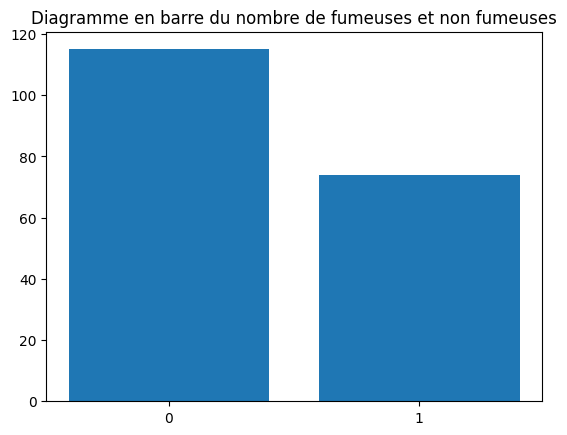

In [81]:
import matplotlib.pyplot as plt


plt.bar(height=diag_gr['n_observations'], x=diag_gr.index)
plt.title("Diagramme en barre du nombre de fumeuses et non fumeuses")

In [83]:
# Scinder le DataFrame en deux en fonction de la valeur contenue dans "SMOKE"
data_fumeur = data[data['SMOKE'] == "1"]
data_non_fumeur = data[data['SMOKE'] == "0"]

Text(0.5, 1.0, "Boxplot de l'age de la mère au moment de la naissance de l'enfant entre fumeur et non-fumeur")

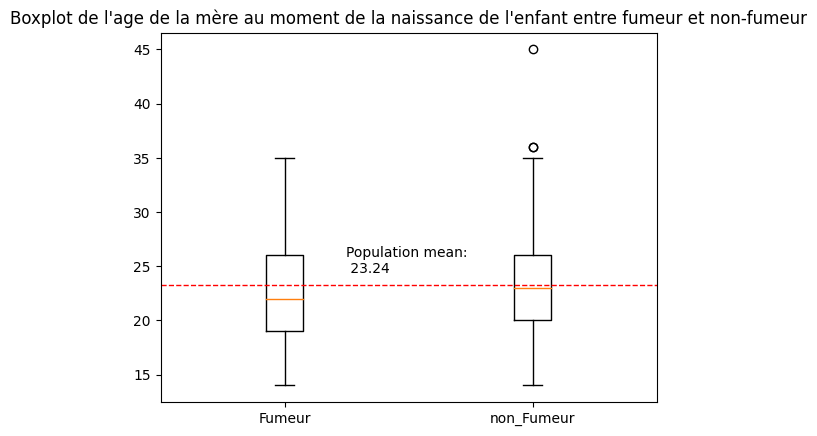

In [92]:
my_dict = {'Fumeur': data_fumeur.AGE, 'non_Fumeur': data_non_fumeur.AGE}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
min_xlim, max_xlim = plt.xlim()

plt.axhline(data.AGE.mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(max_xlim*.5, data.AGE.mean()*1.05, 'Population mean: \n {:.2f}'.format(data.AGE.mean() ) )


plt.title("Boxplot de l'age de la mère au moment de la naissance de l'enfant entre fumeur et non-fumeur")

Text(0.5, 1.0, "Boxplot du poids de naissance de l'enfant entre mère fumeuse et non-fumeuse")

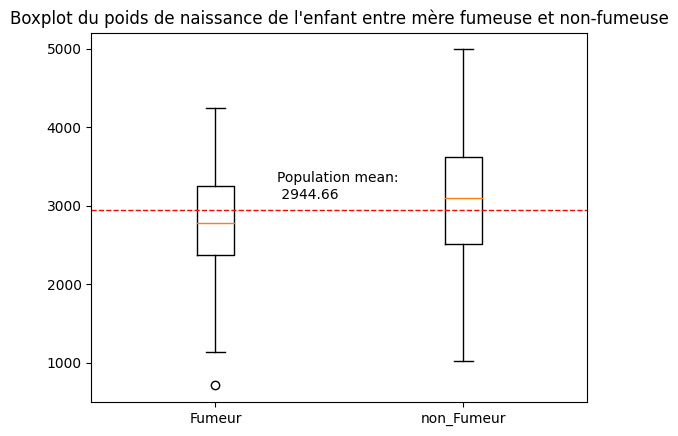

In [93]:
my_dict = {'Fumeur': data_fumeur.BWT, 'non_Fumeur': data_non_fumeur.BWT}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
min_xlim, max_xlim = plt.xlim()

plt.axhline(data.BWT.mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(max_xlim*.5, data.BWT.mean()*1.05, 'Population mean: \n {:.2f}'.format(data.BWT.mean() ) )


plt.title("Boxplot du poids de naissance de l'enfant entre mère fumeuse et non-fumeuse")

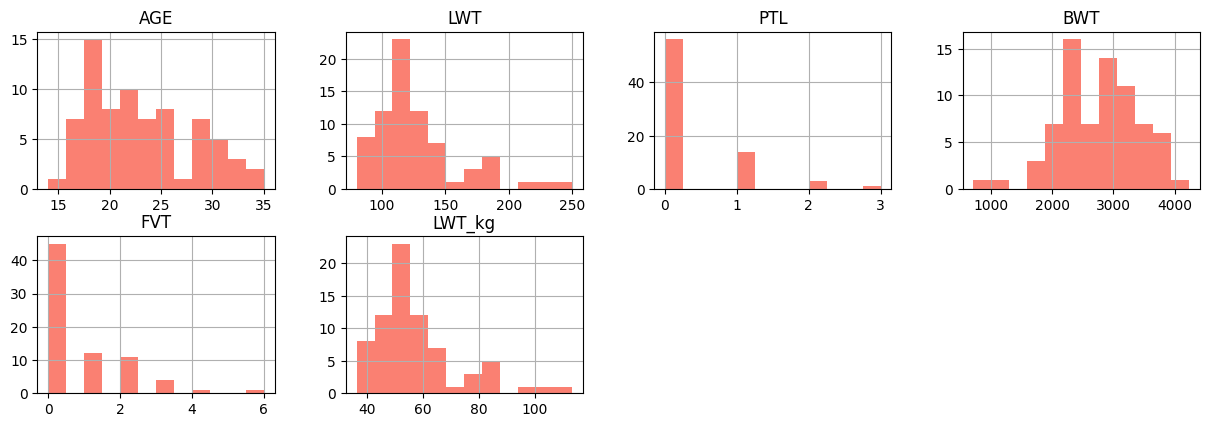

In [94]:
data_mean=data_fumeur.iloc[:,1:]
hist_mean=data_mean.hist( bins=12, figsize=(15, 10),grid=True, color = 'salmon', layout=(4,4) )

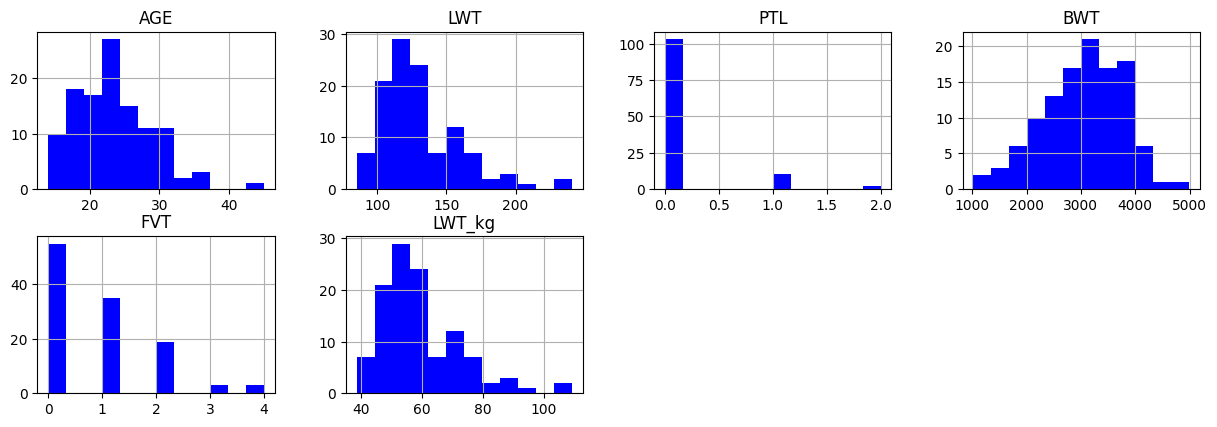

In [96]:
data_mean=data_non_fumeur.iloc[:,1:]
hist_mean=data_mean.hist( bins=12, figsize=(15, 10),grid=True, color = 'blue', layout=(4,4) )

## 4. Est-ce que le fait qu'une mère fume pendant la grossesse impacte-t-il négativement le poids de l'enfant à la naissance ?
Rédigez les hypothèses H0 et H1, et répondez-y.

On veut comparer le poids moyens des enfants entre deux groupes:



#### Hypothèse nulle (H0) : Le poids moyen des enfants nés de mères fumeuses est supérieur ou égal à celui des enfants nés de mères non-fumeuses.
> $\mu_1 >= \mu_0 $


#### Hypothèse alternative (H1) : le poids moyen des enfants nés de mères fumeuses est inférieur à celui des enfants nés de mères non-fumeuses.
> $\mu_1 <\mu_0 $

In [119]:
import scipy.stats as stats

On veut utiliser un test de comparaison de moyenne. Pour utiliser le test t de student, on doit vérifier la distribution normale et l'homoscédasticité. Vérifions:

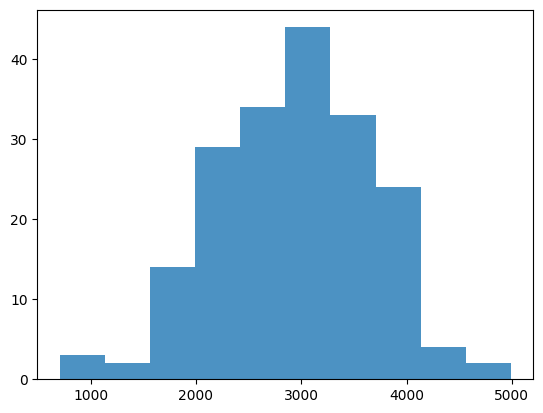

In [112]:
plot = plt.hist(x=data.BWT, label='Poids de l enfant', alpha=.8)

In [98]:
f_bwt = data_fumeur['BWT'].values
nf_bwt = data_non_fumeur['BWT'].values


print("Variance du poids de enfants chez les mères fumeuses: {:.6f}".format( f_bwt.var()) )
print("Variance du poids de enfants chez les mères non fumeuses {:.6f}".format( nf_bwt.var()) )

Variance du poids de enfants chez les mères fumeuses: 429811.400292
Variance du poids de enfants chez les mères non fumeuses 561196.545936


### Les Variances sont similaires, et la variable semble etre distribuée normalement. On va utiliser un test t de student

In [108]:
t_stat, p_value = stats.ttest_ind(f_bwt, nf_bwt, alternative='less')

print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  -2.6336039163601987
P-Value:  0.0045778300158183655


Puisque la p-value (0.0046) est inférieure à 0,05, nous rejetons l'hypothèse nulle (H0). Cela signifie qu'il y a un impact négatif significatif du tabagisme sur le poids de naissance des enfants.

## 5. Est-ce que poids de la mère est positivement lié au poids de son enfant  ?

- Rédigez les hypothèses H0 et H1, et répondez-y.
- Utilisez la fonction <code>pearsonr()</code> du package scipy.stats

On veut faire un test de corrélation entre le poids de l'enfant et la mère:



#### Hypothèse nulle (H0) : Il y a une corrélation négative ou nulle entre le poids de la mère (LWT) et le poids de l'enfant à la naissance (BWT).
> $ p =< 0$


#### Hypothèse alternative (H1): Il y a une corrélation positive entre le poids de la mère et le poids de l'enfant à la naissance.
> $ p > 0 $

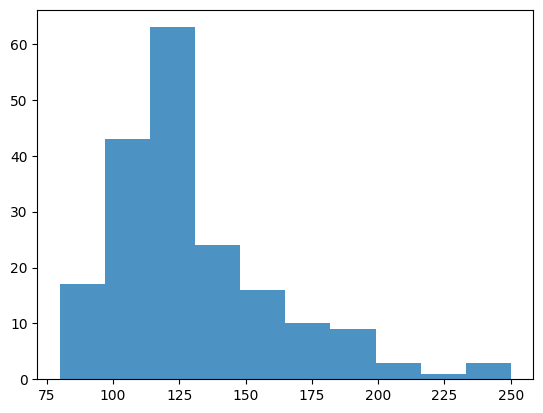

In [113]:
plot = plt.hist(x=data.LWT, label='Poids de l enfant', alpha=.8)

Le poids de l'enfant est distribué normalement, on va considérer que le poids de la mère l'est aussi. On peut donc utiliser le test paramétrique de corrélation de pearson.

Text(0, 0.5, 'Poids de la mère')

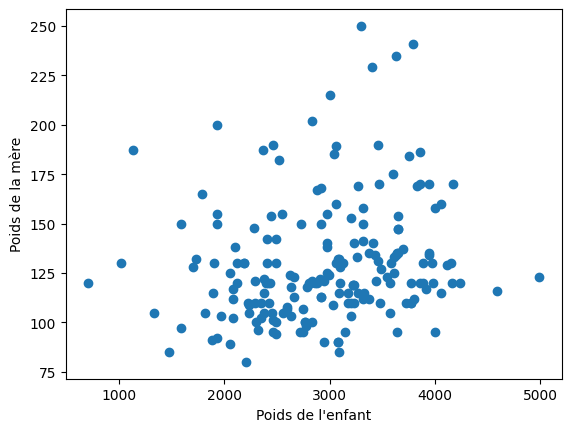

In [117]:
plt.scatter(data.BWT, data.LWT, alpha=1)


plt.xlabel("Poids de l'enfant")
plt.ylabel("Poids de la mère")

In [123]:
corr_coef, p_value = stats.pearsonr(data['LWT'], data['BWT'], alternative="greater")

print("coefficient de corrélation: ", corr_coef)
print("P-Value: ", p_value)

coefficient de corrélation:  0.18578870880181364
P-Value:  0.005240359644046798


la p-value est inférieure à 0,05 avec une corrélation positive (corr_coef = 0.18), nous rejetons H0 et concluons qu'il y a une faible corrélation positive significative entre le poids de la mère et celui de l'enfant.